In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Test to see approximate accuracy by splitting the training data to train and test data = 7:3
train_file = "./COMP30027_2021_Project2_datasets/recipe_train.csv"
train_data = pd.read_csv(train_file)
X_train_raw = train_data.iloc[:,:-1]
y_train_raw = train_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_train_raw,y_train_raw,test_size=0.33)

train_n_steps = pd.DataFrame(X_train.n_steps)
train_n_steps.reset_index(drop=True, inplace=True)
test_n_steps = pd.DataFrame(X_test.n_steps)
test_n_steps.reset_index(drop=True, inplace=True)

train_n_ingredients = pd.DataFrame(X_train.n_ingredients)
train_n_ingredients.reset_index(drop=True, inplace=True)
test_n_ingredients = pd.DataFrame(X_test.n_ingredients)
test_n_ingredients.reset_index(drop=True, inplace=True)

# tfidf vectorizer on feature 'name'
vec = TfidfVectorizer(stop_words='english')
X_train_name = vec.fit_transform(X_train.name)
X_test_name = vec.transform(X_test.name)
df_train_name = pd.DataFrame(X_train_name.todense(),columns = vec.get_feature_names())
df_test_name = pd.DataFrame(X_test_name.todense(),columns = vec.get_feature_names())

# tfidf vectorizer on feature 'steps'
X_train_steps = vec.fit_transform(X_train.steps)
X_test_steps = vec.transform(X_test.steps)
df_train_steps = pd.DataFrame(X_train_steps.todense(),columns = vec.get_feature_names())
df_test_steps = pd.DataFrame(X_test_steps.todense(),columns = vec.get_feature_names())

# tfidf vectorizer on feature 'ingredients'
X_train_ing = vec.fit_transform(X_train.ingredients)
X_test_ing = vec.transform(X_test.ingredients)
df_train_ing = pd.DataFrame(X_train_ing.todense(),columns = vec.get_feature_names())
df_test_ing = pd.DataFrame(X_test_ing.todense(),columns = vec.get_feature_names())

train = pd.concat([df_train_name, df_train_steps,df_train_ing,train_n_steps,train_n_ingredients],axis=1)
test = pd.concat([df_test_name, df_test_steps,df_test_ing,test_n_steps,test_n_ingredients],axis=1)


In [1]:
#STACKING FROM W8 Prac
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(1)

class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X):
        X_meta = self._predict_base(X)     
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)

### Individual Classifiers - FULL FEATURES

In [11]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import time
from time import ctime

models = [MultinomialNB(),
          svm.LinearSVC(),
          DecisionTreeClassifier(),
          LogisticRegression(max_iter=1000)]

titles = ['MNB',
          'LinearSVC',
          'Decision Tree',
          'Logistic Regression']

for title, model in zip(titles, models):
    print(title)
    start = time.time()
    print("START ",start)
    model.fit(train,y_train)
    acc = model.score(test,y_test)
    end = time.time()
    print("END ",end)
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t," s")


MNB
START  1621478755.5711548
END  1621478756.01682
MNB Accuracy: 0.718939393939394 Time: 0.4456651210784912  s
LinearSVC
START  1621478756.01766
/Users/patriciaangelica/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
END  1621478771.5146492
LinearSVC Accuracy: 0.7908333333333334 Time: 15.496989250183105  s
Decision Tree
START  1621478771.5150971
END  1621478777.147224
Decision Tree Accuracy: 0.7165151515151515 Time: 5.632126808166504  s
Logistic Regression
START  1621478777.147409
END  1621478882.139201
Logistic Regression Accuracy: 0.7925757575757576 Time: 104.99179196357727  s
/Users/patriciaangelica/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

### Stacking - FULL FEATURES

In [15]:
# Meta Learner : Logistic Regression 
# Base Learners : DT + MNB
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import time
from time import ctime

classifiers = [MultinomialNB(),
          DecisionTreeClassifier()]

titles = ['MNB',
          'Decision Tree']

meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)
start = time.time()
print("Meta learner: Logistic Regression - Start ",start)
stacker_lr.fit(train,y_train)
acc = stacker_lr.score(test,y_test)
end = time.time()
print("Meta learner: Logistic Regression - End ",end)
print("Accuracy ",acc)
t = end - start
print('Time:', t," s")

Meta learner: Logistic Regression - Start  1621479573.625083
Meta learner: Logistic Regression - End  1621479579.623137
Accuracy  0.7187878787878788
Time: 5.998054027557373  s


In [16]:
# Meta Learner : Logistic Regression 
# Base Learners : DT + MNB + LogReg
classifiers1 = [MultinomialNB(),
                DecisionTreeClassifier(),
                LogisticRegression()]

titles1 = ['MNB',
          'Decision Tree',
          'Logistic Regression']

meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)
start = time.time()
print("Meta learner: Logistic Regression - Start ",start)
stacker_lr.fit(train, y_train)
acc = stacker_lr.score(test,y_test)
end = time.time()
print("Meta learner: Logistic Regression - End ",end)
print("Accuracy ",acc)
t = end - start
print('Time:', t," s")

Meta learner: Logistic Regression - Start  1621479604.098793
/Users/patriciaangelica/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
Meta learner: Logistic Regression - End  1621479620.193346
Accuracy  0.7221969696969697
Time: 16.094552993774414  s


### CHI SQUARE

In [2]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
import time
from time import ctime

kbest_chi2 = SelectKBest(chi2, k=1000).fit(train, y_train)
X_train_kbest_chi2 = kbest_chi2.transform(train)
X_test_kbest_chi2 = kbest_chi2.transform(test)

### Individual Classifiers - CHI SQUARE

In [9]:

models = [MultinomialNB(),
          svm.LinearSVC(),
          DecisionTreeClassifier(),
          LogisticRegression()]
          
titles = ['MNB',
          'LinearSVC',
          'Decision Tree',
          'Logistic Regression']

for title, model in zip(titles, models):
    print(title)
    start = time.time()
    print("START ",start)
    model.fit(X_train_kbest_chi2,y_train)
    acc = model.score(X_test_kbest_chi2,y_test)
    end = time.time()
    print("END ",end)
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t," s")

MNB
START  1621475063.5190709
END  1621475092.2789571
MNB Time: 28.759886264801025  s
LinearSVC
START  1621475093.6496482


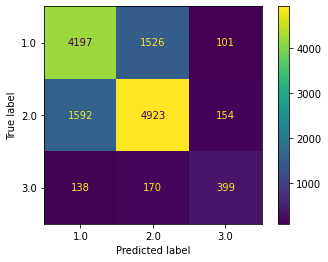

In [15]:
### Confusion Matrix for TFIDF - CHI SQUARE K=1000
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
decision_tree = DecisionTreeClassifier().fit(X_train_kbest_chi2,y_train)
prediction = decision_tree.predict(X_test_kbest_chi2)

cm = confusion_matrix(y_test, prediction,labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

### STACKING - CHI SQUARE

In [ ]:
# Meta Learner : Logistic Regression 
# Base Learners : DT + MNB

classifiers1 = [MultinomialNB(),
          DecisionTreeClassifier()]

titles1 = ['MNB',
          'Decision Tree']

meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)
start = time.time()
print("Meta learner: Logistic Regression - Start ",start)
stacker_lr.fit(X_train_kbest_chi2,y_train)
acc = stacker_lr.score(X_test_kbest_chi2,y_test)
end = time.time()
print("Meta learner: Logistic Regression - End ",end)
print("Accuracy ",acc)
t = end - start
print('Time:', t," s")

In [ ]:
# Meta Learner : Logistic Regression 
# Base Learners : DT + MNB + LogReg

classifiers = [MultinomialNB(),
           DecisionTreeClassifier(),
           LogisticRegression()]

titles = ['MNB',
          'Decision Tree',
          'Logistic Regression']

meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)
start = time.time()
print("Meta learner: Logistic Regression - Start ",start)
stacker_lr.fit(X_train_kbest_chi2,y_train)
acc = stacker_lr.score(X_test_kbest_chi2,y_test)
end = time.time()
print("Meta learner: Logistic Regression - End ",end)
print("Accuracy ",acc)
t = end - start
print('Time:', t," s")